### Imports

In [1]:
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

#SVM
from sklearn.svm import SVC

#KNN
from sklearn.neighbors import KNeighborsClassifier

### Preparação dos dados

#### Visualização dos dados

In [3]:
#Primeiro, vamos abrir o arquivo CSV
df = pd.read_csv("pulsar_data_train.csv")

# Vemos analisar as primeiras 10 linhas
df.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
8,95.007812,40.219805,0.347578,1.153164,2.770067,18.217741,7.851205,70.801938,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,NaN,5.702532,36.342493,0.0


In [4]:
df.corr()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.551105,-0.872595,-0.737598,-0.298123,-0.313845,0.235781,0.146782,-0.676129
Standard deviation of the integrated profile,0.551105,1.000000,-0.527779,-0.539896,-0.001656,-0.058241,0.031671,0.028757,-0.365757
Excess kurtosis of the integrated profile,-0.872595,-0.527779,1.000000,0.944648,0.414739,0.439037,-0.341394,-0.214991,0.791661
Skewness of the integrated profile,-0.737598,-0.539896,0.944648,1.000000,0.412659,0.420058,-0.328675,-0.204148,0.707086
Mean of the DM-SNR curve,-0.298123,-0.001656,0.414739,0.412659,1.000000,0.797974,-0.616385,-0.353898,0.400375
Standard deviation of the DM-SNR curve,-0.313845,-0.058241,0.439037,0.420058,0.797974,1.000000,-0.808061,-0.574594,0.497210
Excess kurtosis of the DM-SNR curve,0.235781,0.031671,-0.341394,-0.328675,-0.616385,-0.808061,1.000000,0.924264,-0.389788
Skewness of the DM-SNR curve,0.146782,0.028757,-0.214991,-0.204148,-0.353898,-0.574594,0.924264,1.000000,-0.259065
target_class,-0.676129,-0.365757,0.791661,0.707086,0.400375,0.497210,-0.389788,-0.259065,1.000000


In [5]:
columns = df.columns
columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

#### Tratamento e divisão dos dados

In [6]:
df.dropna(inplace=True)

In [7]:
X = df.drop("target_class",axis=1)
y = df["target_class"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.3, shuffle=True)

In [9]:
scaler = StandardScaler()

In [10]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### SVM

In [11]:
result_df = pd.DataFrame(columns=["Kernel", "Regularisation", "Accuracy", "Precision", "Recall", "F1 Score"])

In [12]:
regularisations = [0.1, 1, 10, 100]
kernels = ["poly", "rbf"]

In [13]:
for c in regularisations :
    for k in kernels : 
        if k == "poly" :
            for d in range(2) :
                svc = SVC(C = c, kernel = k, degree = d+1)
                svc.fit(X_train,y_train)
                y_pred = svc.predict(X_test)
                
                acc = accuracy_score(y_test, y_pred)
                pre = precision_score(y_test,y_pred)
                rec = recall_score(y_test,y_pred)
                f1 = f1_score(y_test,y_pred)
                
                new_row = {'Kernel':k + "-" + str(d+1),'Regularisation':c,'Accuracy': acc, 
                                  'Precision':pre, 'Recall':rec, 'F1 Score':f1};
                result_df = pd.concat([result_df, pd.DataFrame([new_row])], ignore_index=True)
            
        else :
            svc = SVC(C = c, kernel = k)
            svc.fit(X_train,y_train)
            y_pred = svc.predict(X_test)
            
            acc = accuracy_score(y_test, y_pred)
            pre = precision_score(y_test,y_pred)
            rec = recall_score(y_test,y_pred)
            f1 = f1_score(y_test,y_pred)
            
            new_row = {'Kernel':k,'Regularisation':c,'Accuracy': acc, 
                                  'Precision':pre, 'Recall':rec, 'F1 Score':f1};
            result_df = pd.concat([result_df, pd.DataFrame([new_row])], ignore_index=True)

        

In [14]:
result_df

,Kernel,Regularisation,Accuracy,Precision,Recall,F1 Score
0,poly-1,0.1,0.975917,0.959799,0.764,0.85078
1,poly-2,0.1,0.970884,0.977401,0.692,0.810304
2,rbf,0.1,0.974838,0.963918,0.748,0.842342
3,poly-1,1,0.978792,0.956938,0.8,0.87146
4,poly-2,1,0.974119,0.978495,0.728,0.834862
5,rbf,1,0.979152,0.95283,0.808,0.874459
6,poly-1,10,0.98059,0.949541,0.828,0.884615
7,poly-2,10,0.974119,0.945,0.756,0.84
8,rbf,10,0.978792,0.924444,0.832,0.875789
9,poly-1,100,0.98023,0.949309,0.824,0.882227


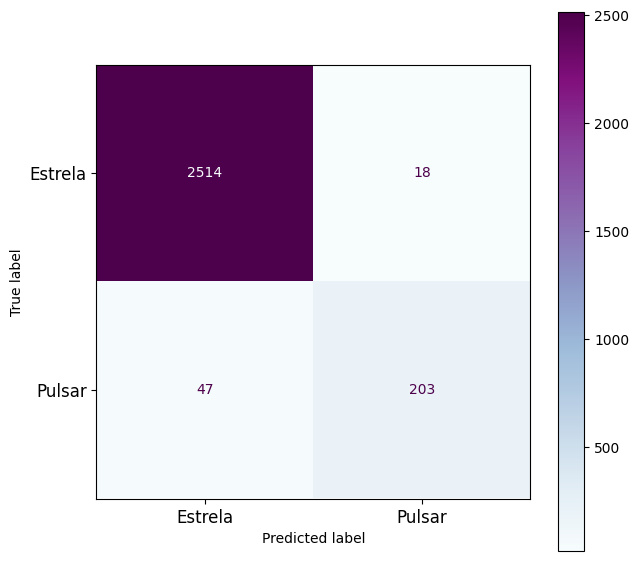

In [15]:
#Código para a matriz de confusão
fig, ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels = [0,1], display_labels = ['Estrela', 'Pulsar'], cmap='BuPu', ax=ax)

ax.tick_params(axis='both', which='major', labelsize=12)

### KNN

In [16]:
# Treinamento do Modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Escolha o número adequado de vizinhos
knn_model.fit(X_train, y_train)

# Avaliação do Modelo
y_pred = knn_model.predict(X_test)

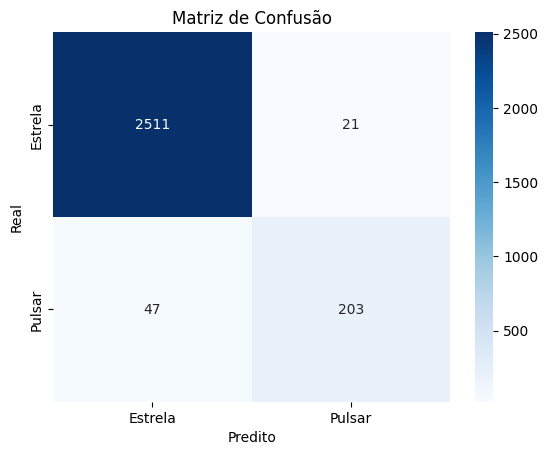

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Estrela', 'Pulsar'], yticklabels=['Estrela', 'Pulsar'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


### Random Forest Tree

In [18]:

#Precisamos transformar as classes em números

lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y)

              precision    recall  f1-score   support

     Estrela       0.99      0.99      0.99      2522
      Pulsar       0.86      0.87      0.86       260

    accuracy                           0.97      2782
   macro avg       0.92      0.93      0.92      2782
weighted avg       0.97      0.97      0.97      2782



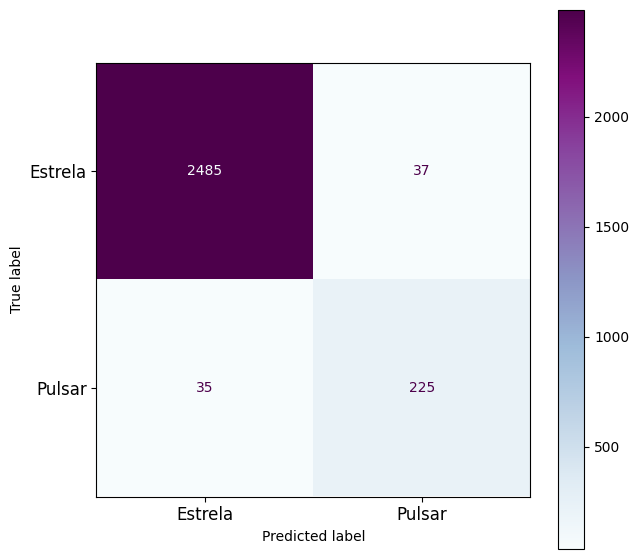

In [19]:
# Importando as bibliotecas necessárias para utilizarmos o modelo das Árvores de Decisão
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Separando os dados em conjuntos teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Esse é o código para o modelo de Árvores de Decisão

# Splitter = "best" indica que utilizaremos a melhor separação possível para os dados

# Criterion = "entropy" indica que a árvore irá buscar ter sempre apenas uma classe dentro de cada folha
# de forma que isso indicaria uma entropia igual a 0

# max_depth é um dos critérios para evitar overfitting, ele exige que a árvore tenha no máximo 4 profundidades

dtc = DecisionTreeClassifier(splitter = "best", criterion = "entropy", max_depth = 4)

# Treinando as Árvores de Decisão
dtc = dtc.fit(X_train, y_train)

# Fazendo as previsões utilizando o nosso conjunto teste
pred = dtc.predict(X_test)


#Código para o Classification Report, onde conseguimos ver a capacidade de classificação do modelo em cada caso
print(classification_report(y_test, pred, labels=[0,1], target_names=['Estrela', 'Pulsar']))

#Código para a matriz de confusão
fig, ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay.from_predictions(y_test, pred, labels = [0,1], display_labels = ['Estrela', 'Pulsar'], cmap='BuPu', ax=ax)
ax.tick_params(axis='both', which='major', labelsize=12)

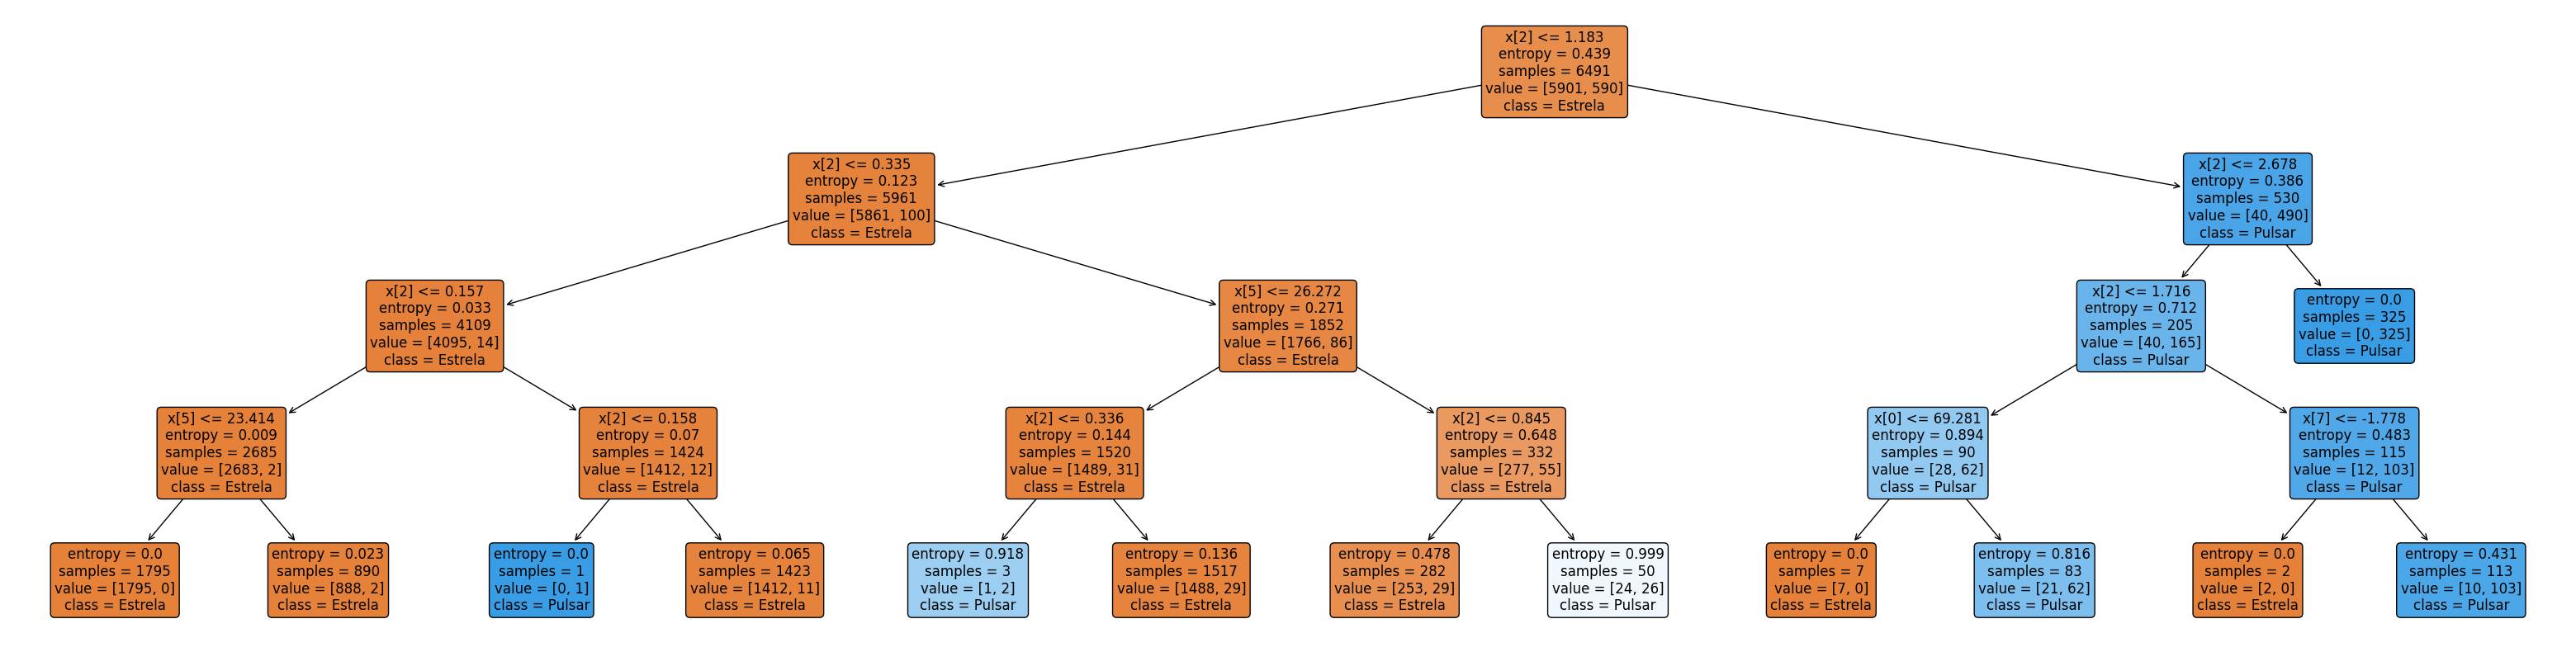

In [20]:
#Código para plotar a árvore

from sklearn.tree import plot_tree

plt.figure(figsize=(40, 10))
plot_tree(
    dtc,
    filled=True,
    #feature_names=["u", "g", "r", "i", "z", "redshift"],
    class_names=["Estrela", "Pulsar"],
    rounded=True,
    fontsize = 12
)
plt.show()
